# Data Preprocessing 
#1.In the given CSV file do the preprocessing.(code)

In [70]:
#importing the pandas 
import pandas as pd

In [71]:
#reading the csv file
df=pd.read_csv("/Users/anandkoti/Downloads/Data Source (sales_transactions).csv")

In [72]:
df.head(50)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/2024 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/2024 01:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/2024 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,4,1003.0,07/08/2024 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/2024 09:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0
5,6,1001.0,NaN,2007,Home Decor,1,NaN,NaN,20,Credit Card,NaN
6,7,1001.0,01/08/2024 13:00,2007,Home Decor,-1,30.0,-30.0,-10,NaN,NaN
7,8,1005.0,04/08/2024 22:00,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0
8,9,1004.0,02/08/2024 23:00,2008,Fashion,1,NaN,NaN,-10,NaN,NaN
9,10,1004.0,01/08/2024 14:00,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0


In [73]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'ProductID',
       'ProductCategory', 'Quantity', 'PricePerUnit', 'TotalAmount',
       'TrustPointsUsed', 'PaymentMethod', 'DiscountApplied'],
      dtype='object')

In [82]:
print(df.isnull().sum())

TransactionID       0
CustomerID          0
TransactionDate     0
ProductID           0
ProductCategory     0
Quantity            0
PricePerUnit       12
TotalAmount        12
TrustPointsUsed     0
PaymentMethod       9
DiscountApplied     3
dtype: int64


In [74]:
df = df.dropna(subset=['CustomerID'])

In [75]:
df = df[df['Quantity'] >= 0]

In [76]:
# Convert the column to string data type
df['TransactionDate'] = df['TransactionDate'].astype(str)

# Identify rows where 'TransactionDate' contains invalid entries
invalid_dates = df[~df['TransactionDate'].str.match(r'\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{2}', na=False)]
print(invalid_dates)
# Option 1: Replace invalid date entries with NaT
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%m/%d/%Y %H:%M', errors='coerce')

# Option 2: Drop rows with invalid date entries
df = df.dropna(subset=['TransactionDate'])
# Convert 'TransactionDate' to datetime if not done already
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Sort the DataFrame by 'TransactionDate'
df_sorted = df.sort_values(by='TransactionDate', ascending=True)

# Display the entire sorted DataFrame
print(df_sorted)



   TransactionID  CustomerID TransactionDate  ProductID ProductCategory   
5              6      1001.0             nan       2007      Home Decor  \

   Quantity  PricePerUnit  TotalAmount  TrustPointsUsed PaymentMethod   
5         1           NaN          NaN               20   Credit Card  \

   DiscountApplied  
5              NaN  
    TransactionID  CustomerID     TransactionDate  ProductID ProductCategory   
45             46      1004.0 2024-01-08 04:00:00       2004            Toys  \
32             33      1001.0 2024-01-08 08:00:00       2007     Electronics   
9              10      1004.0 2024-01-08 14:00:00       2005         Fashion   
27             28      1003.0 2024-01-08 14:00:00       2006            Toys   
20             21      1004.0 2024-01-08 23:00:00       2006            Toys   
47             48      1003.0 2024-02-08 03:00:00       2005      Home Decor   
14             15      1001.0 2024-02-08 15:00:00       2003            Toys   
46             47   

In [77]:
df_sorted.head(50)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
45,46,1004.0,2024-01-08 04:00:00,2004,Toys,1,NaN,NaN,100,NaN,20.0
32,33,1001.0,2024-01-08 08:00:00,2007,Electronics,3,20.0,60.0,50,Credit Card,20.0
9,10,1004.0,2024-01-08 14:00:00,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0
27,28,1003.0,2024-01-08 14:00:00,2006,Toys,1,10.0,10.0,50,Cash,30.0
20,21,1004.0,2024-01-08 23:00:00,2006,Toys,1,50.0,50.0,0,NaN,30.0
47,48,1003.0,2024-02-08 03:00:00,2005,Home Decor,0,NaN,NaN,50,NaN,50.0
14,15,1001.0,2024-02-08 15:00:00,2003,Toys,1,30.0,30.0,-10,Cash,20.0
46,47,1002.0,2024-02-08 16:00:00,2006,Fashion,1,50.0,50.0,20,Credit Card,25.0
25,26,1004.0,2024-02-08 16:00:00,2007,Home Decor,2,10.0,20.0,100,Trust Points,30.0
2,3,1004.0,2024-02-08 19:00:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0


In [78]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 45 to 22
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    41 non-null     int64         
 1   CustomerID       41 non-null     float64       
 2   TransactionDate  41 non-null     datetime64[ns]
 3   ProductID        41 non-null     int64         
 4   ProductCategory  41 non-null     object        
 5   Quantity         41 non-null     int64         
 6   PricePerUnit     29 non-null     float64       
 7   TotalAmount      29 non-null     float64       
 8   TrustPointsUsed  41 non-null     int64         
 9   PaymentMethod    32 non-null     object        
 10  DiscountApplied  38 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 3.8+ KB


In [88]:
#nan in priceper unit filling with meam
df_sorted['PricePerUnit'].fillna(df_sorted['PricePerUnit'].mean(), inplace=True)


#non value in totalamout=quantity*priceperunit
df_sorted['TotalAmount'] = df['TotalAmount'].where(pd.notnull(df['TotalAmount']), None)

df_sorted['TotalAmount'] = df_sorted['TotalAmount'].combine_first(df_sorted['Quantity'] * df_sorted['PricePerUnit'])


In [89]:
print(df_sorted.isnull().sum())

TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      9
DiscountApplied    3
dtype: int64


In [90]:
#converting the categorial value into a numeric value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_sorted['PaymentMethod'] = le.fit_transform(df_sorted['PaymentMethod'])
df_sorted['ProductCategory'] = le.fit_transform(df_sorted['ProductCategory'])

In [91]:
df_sorted.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
45,46,1004.0,2024-01-08 04:00:00,2004,4,1,118.275862,118.275862,100,3,20.0
32,33,1001.0,2024-01-08 08:00:00,2007,0,3,20.000000,60.000000,50,1,20.0
9,10,1004.0,2024-01-08 14:00:00,2005,1,2,500.000000,1000.000000,-10,0,30.0
27,28,1003.0,2024-01-08 14:00:00,2006,4,1,10.000000,10.000000,50,0,30.0
20,21,1004.0,2024-01-08 23:00:00,2006,4,1,50.000000,50.000000,0,3,30.0


2.Write the steps you followed.
* load the dataset
* calculate the null values
* drop the null customerId colum because customerID cant null
* removing the quantity with negtive values
* sorted the data into ascendig oreder by transctiondate
* nan value in priceperunit fill with mean
* totalamout nan value fille with priceperunit*quntity
* using label encoder cinverting categorialvalue into numeric value


3.What was your thought process when you first saw the data
* removing the null value or handling the null values
* handling the outlier
* 

# Data Aggregation and Grouping

1.What all fields among them you think can be aggregated? Name them
2.What kind of aggregation (for every column) would make sense and why?

In [96]:

grouped_sum = df_sorted.groupby('TransactionDate').sum()#with a use of trasctiondate calculate sum of the functio  aggregation
print(grouped_sum)



                     TransactionID  CustomerID  ProductID  ProductCategory   
TransactionDate                                                              
2024-01-08 04:00:00             46      1004.0       2004                4  \
2024-01-08 08:00:00             33      1001.0       2007                0   
2024-01-08 14:00:00             38      2007.0       4011                5   
2024-01-08 23:00:00             21      1004.0       2006                4   
2024-02-08 03:00:00             48      1003.0       2005                3   
2024-02-08 15:00:00             15      1001.0       2003                4   
2024-02-08 16:00:00             73      2006.0       4013                4   
2024-02-08 19:00:00              3      1004.0       2002                2   
2024-02-08 20:00:00             29      1003.0       2007                2   
2024-02-08 23:00:00              9      1004.0       2008                1   
2024-03-08 04:00:00             20      1002.0       2007       

In [97]:
# Group by 'Date' and  multiple aggregation functions(totalamount ,quantity ) sum and mean
grouped_multiple = df.groupby('TransactionDate').agg({
    'TotalAmount': ['sum', 'mean'],
    'Quantity': ['sum', 'mean']
})
print(grouped_multiple)


                    TotalAmount         Quantity     
                            sum    mean      sum mean
TransactionDate                                      
2024-01-08 04:00:00         0.0     NaN        1  1.0
2024-01-08 08:00:00        60.0    60.0        3  3.0
2024-01-08 14:00:00      1010.0   505.0        3  1.5
2024-01-08 23:00:00        50.0    50.0        1  1.0
2024-02-08 03:00:00         0.0     NaN        0  0.0
2024-02-08 15:00:00        30.0    30.0        1  1.0
2024-02-08 16:00:00        70.0    35.0        3  1.5
2024-02-08 19:00:00        90.0    90.0        3  3.0
2024-02-08 20:00:00       200.0   200.0        2  2.0
2024-02-08 23:00:00         0.0     NaN        1  1.0
2024-03-08 04:00:00         0.0     NaN        2  2.0
2024-03-08 14:00:00       100.0   100.0        1  1.0
2024-03-08 16:00:00        20.0    20.0        1  1.0
2024-03-08 22:00:00       500.0   500.0        1  1.0
2024-04-08 08:00:00         0.0     0.0        0  0.0
2024-04-08 09:00:00       15

In [98]:
# Group by 'transction' and count the number of occurrences
grouped_sum = df_sorted.groupby('TransactionDate').count()
print(grouped_sum)



                     TransactionID  CustomerID  ProductID  ProductCategory   
TransactionDate                                                              
2024-01-08 04:00:00              1           1          1                1  \
2024-01-08 08:00:00              1           1          1                1   
2024-01-08 14:00:00              2           2          2                2   
2024-01-08 23:00:00              1           1          1                1   
2024-02-08 03:00:00              1           1          1                1   
2024-02-08 15:00:00              1           1          1                1   
2024-02-08 16:00:00              2           2          2                2   
2024-02-08 19:00:00              1           1          1                1   
2024-02-08 20:00:00              1           1          1                1   
2024-02-08 23:00:00              1           1          1                1   
2024-03-08 04:00:00              1           1          1       

In [102]:
# Group by 'transctindate' and find the min and max
grouped_min_max = df_sorted.groupby('TransactionDate').agg({'TotalAmount': ['min', 'max'], 'TrustPointsUsed': ['min', 'max']})
print(grouped_min_max)


                     TotalAmount              TrustPointsUsed     
                             min          max             min  max
TransactionDate                                                   
2024-01-08 04:00:00   118.275862   118.275862             100  100
2024-01-08 08:00:00    60.000000    60.000000              50   50
2024-01-08 14:00:00    10.000000  1000.000000             -10   50
2024-01-08 23:00:00    50.000000    50.000000               0    0
2024-02-08 03:00:00     0.000000     0.000000              50   50
2024-02-08 15:00:00    30.000000    30.000000             -10  -10
2024-02-08 16:00:00    20.000000    50.000000              20  100
2024-02-08 19:00:00    90.000000    90.000000               0    0
2024-02-08 20:00:00   200.000000   200.000000              20   20
2024-02-08 23:00:00   118.275862   118.275862             -10  -10
2024-03-08 04:00:00   236.551724   236.551724             -10  -10
2024-03-08 14:00:00   100.000000   100.000000             -10 

In [104]:
#grouby with productID AND TOTAL AMOUNT
sales_per_product = df_sorted.groupby('ProductID')['TotalAmount'].sum()
sales_per_product

ProductID
2001     713.103448
2002     590.000000
2003     921.379310
2004     148.275862
2005    2736.551724
2006     310.000000
2007    1471.379310
2008     801.379310
Name: TotalAmount, dtype: float64

In [105]:
#groupny costomerid with quantity and count
orders_per_customer = df_sorted.groupby('CustomerID')['Quantity'].count()
orders_per_customer

CustomerID
1001.0    13
1002.0     9
1003.0     9
1004.0     7
1005.0     3
Name: Quantity, dtype: int64

In [106]:
#calculating mean groupby productId by productcategory
average_sale= df_sorted.groupby('ProductID')['ProductCategory'].mean()
average_sale

ProductID
2001    2.200000
2002    1.000000
2003    2.571429
2004    2.333333
2005    1.600000
2006    3.400000
2007    1.875000
2008    1.833333
Name: ProductCategory, dtype: float64

In [111]:
#min and max calucate with groupby product id and price oer unit
order_stats = df_sorted.groupby('ProductID')['Quantity'].agg(['min', 'max'])
order_stats

,min,max
ProductID,,
2001,1,3
2002,1,3
2003,0,5
2004,0,1
2005,0,3
2006,1,3
2007,1,3
2008,0,3


In [112]:
#min and max calucate with groupby product id and 

order_stats1 = df_sorted.groupby('ProductID')['TotalAmount'].agg(['min', 'max'])
order_stats1

,min,max
ProductID,,
2001,30.0,354.827586
2002,90.0,500.000000
2003,0.0,591.379310
2004,0.0,118.275862
2005,0.0,1500.000000
2006,10.0,150.000000
2007,10.0,500.000000
2008,0.0,354.827586


In [154]:
#groupby productcategory and aggregate with transction,quantity and calcvulate sum,mean,count 
df_sorted.groupby('ProductCategory').agg({'TransactionID': ['sum', 'mean'], 'Quantity': 'count'})


TransactionID            Quantity
                          sum       mean    count
ProductCategory                                  
0                         309  30.900000       10
1                         123  24.600000        5
2                         112  16.000000        7
3                         192  32.000000        6
4                         311  23.923077       13

# Data validation

1.How do you know, your preprocessing was correct?
   
   * using a ml model calculate the accuracy and precision of before and after the preprocessing
   * compare the both accracy and precion of both before and after 
   * if accuracy of model after is high then it good 
   * if accuracy is low the its is not good
   
   

In [155]:
df = df.dropna(subset=['TotalAmount'])
df = df.dropna(subset=['PricePerUnit'])
df.isnull().sum()


TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      4
DiscountApplied    2
Cluster            0
PredictedLabel     0
dtype: int64

In [220]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset

# Select features and target label
features = df[['TotalAmount', 'Quantity']]
target = df['ProductID']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" before preprocessingAccuracy: {accuracy:.2f}")


 before preprocessingAccuracy: 0.00


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset

# Select features and target label
features = df_sorted[['TotalAmount', 'Quantity']]
target = df_sorted['ProductID']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Initialize KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.15


# Data Visualisations

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


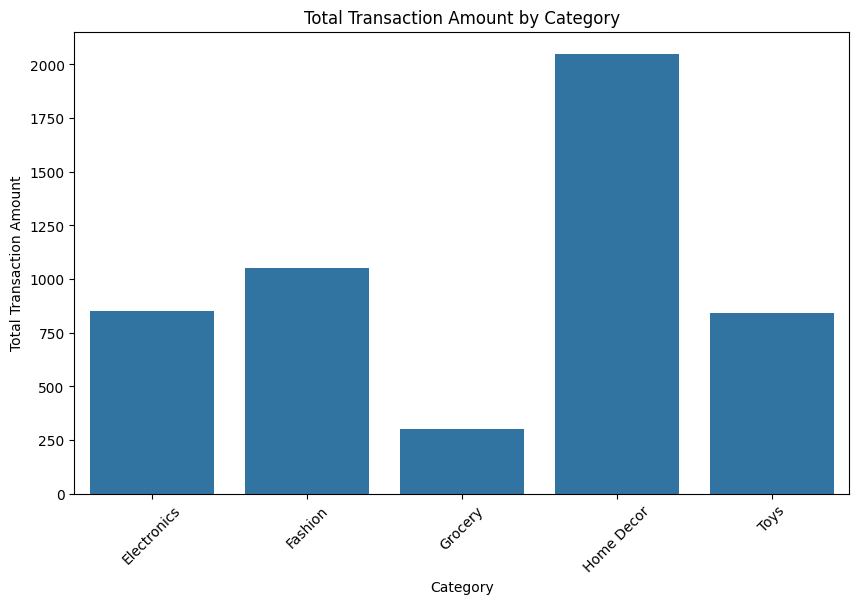

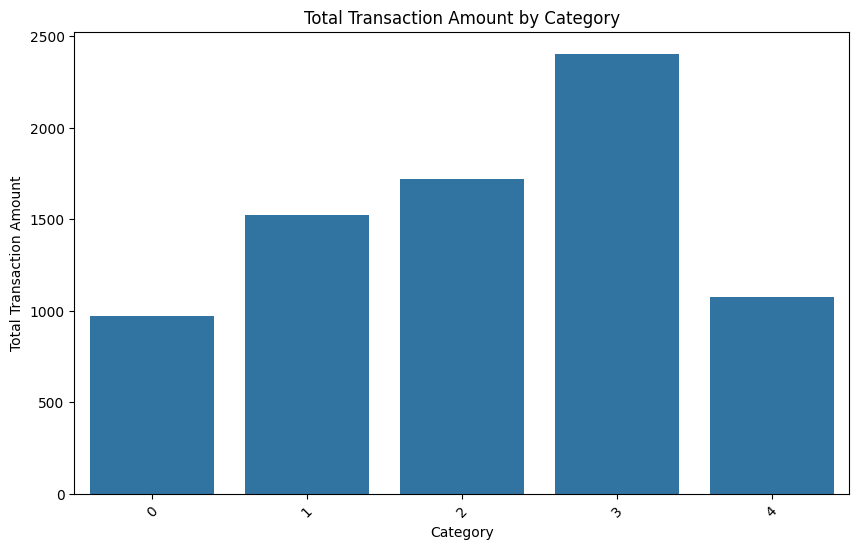

In [232]:
# Aggregate by Category
category_data = df.groupby('ProductCategory').agg({'TotalAmount': 'sum'}).reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='TotalAmount', data=category_data)
plt.title('before preprocessingTotal Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# Aggregate by Category
category_data = df_sorted.groupby('ProductCategory').agg({'TotalAmount': 'sum'}).reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='TotalAmount', data=category_data)
plt.title('after preprocessingTotal Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()



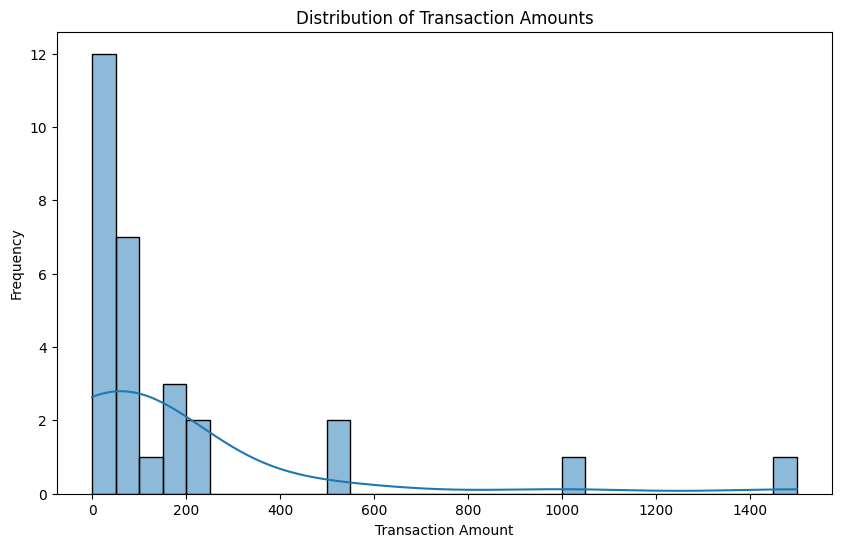

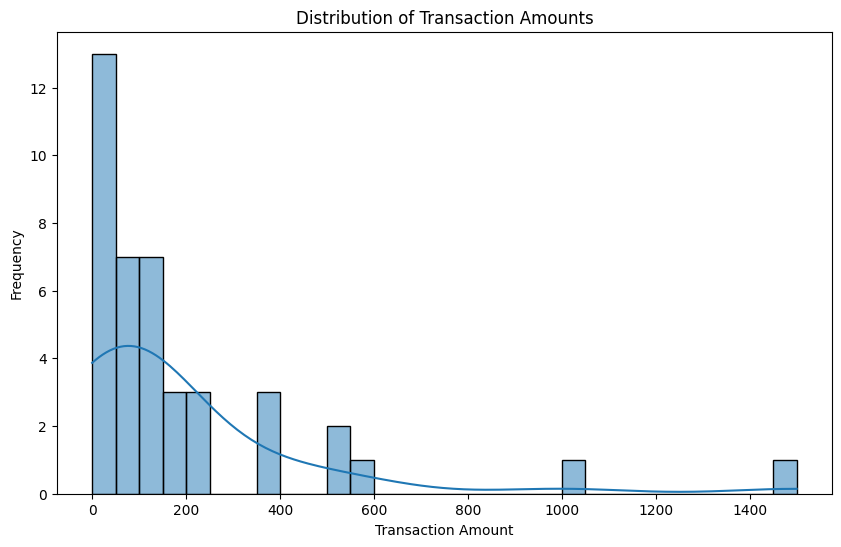

In [233]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'], bins=30, kde=True)
plt.title('before preprocessingDistribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['TotalAmount'], bins=30, kde=True)
plt.title('after preprocessing Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



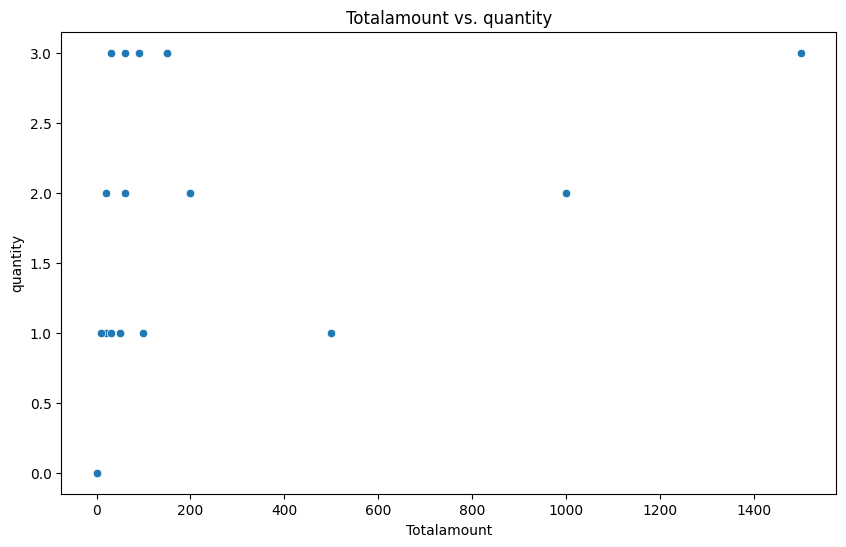

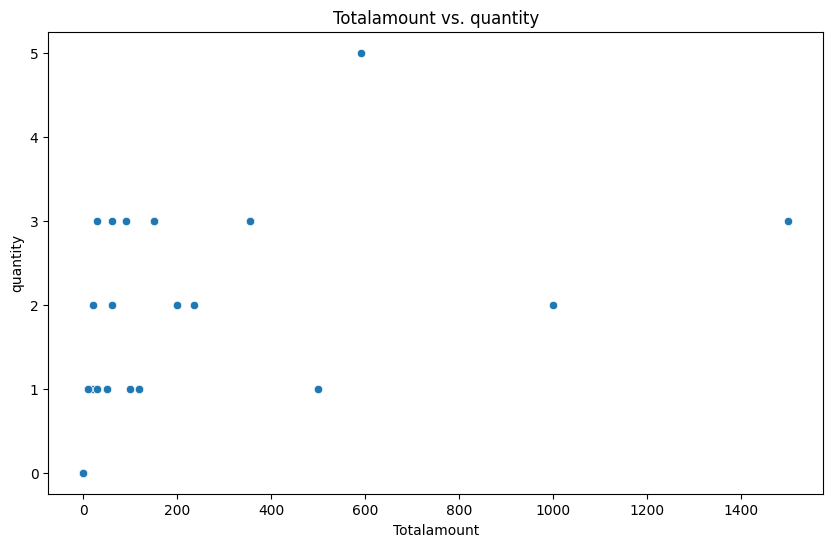

In [234]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='Quantity', data=df)
plt.title('before preprocessingTotalamount vs. quantity')
plt.xlabel('Totalamount')
plt.ylabel('quantity')
plt.show()
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='Quantity', data=df_sorted)
plt.title('after preprocessingTotalamount vs. quantity')
plt.xlabel('Totalamount')
plt.ylabel('quantity')
plt.show()



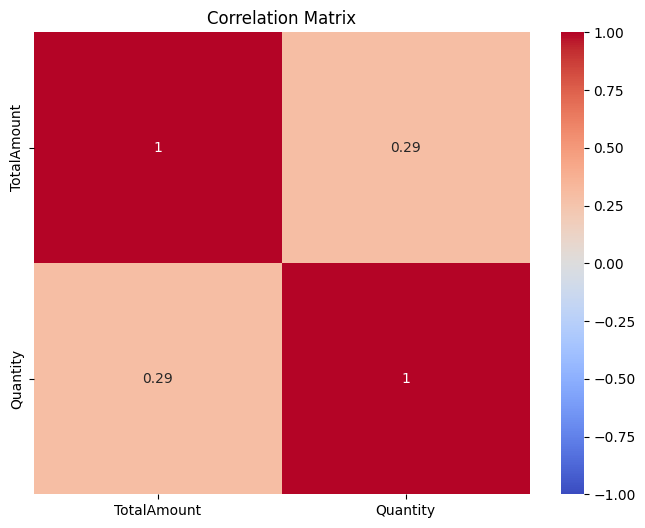

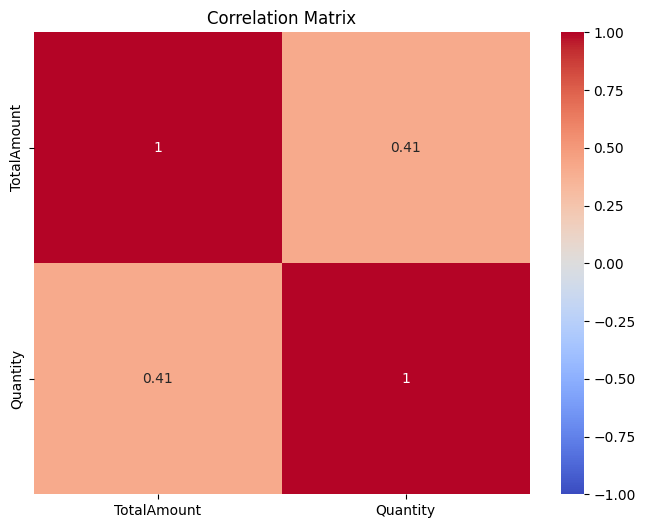

In [235]:
# Compute correlation matrix
correlation_matrix = df[['TotalAmount', 'Quantity']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('before preprocessingCorrelation Matrix')
plt.show()
# Compute correlation matrix
correlation_matrix = df_sorted[['TotalAmount', 'Quantity']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('after preprocessingCorrelation Matrix')
plt.show()


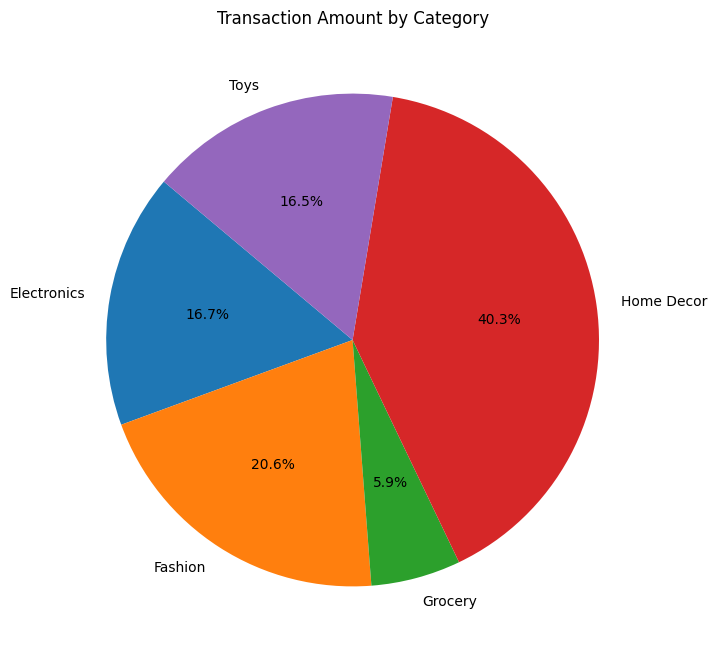

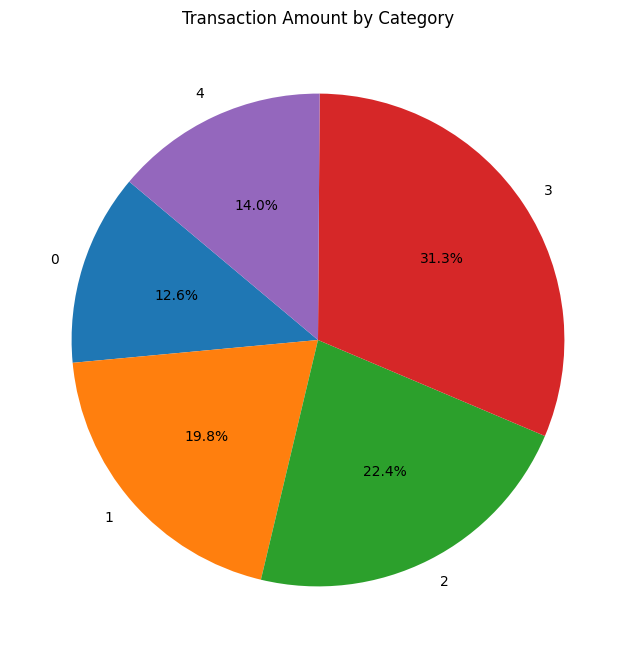

In [236]:
# Aggregate by Category
category_data = df.groupby('ProductCategory').agg({'TotalAmount': 'sum'}).reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_data['TotalAmount'], labels=category_data['ProductCategory'], autopct='%1.1f%%', startangle=140)
plt.title('before preprocessingTransaction Amount by Category')
plt.show()
# Aggregate by Category
category_data = df_sorted.groupby('ProductCategory').agg({'TotalAmount': 'sum'}).reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_data['TotalAmount'], labels=category_data['ProductCategory'], autopct='%1.1f%%', startangle=140)
plt.title('after preprocessingTransaction Amount by Category')
plt.show()



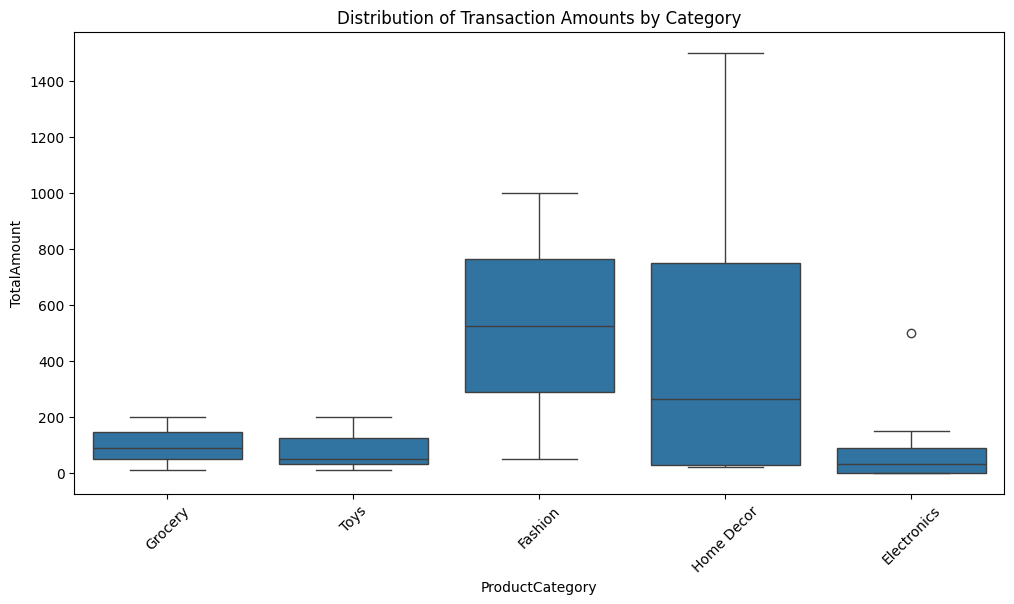

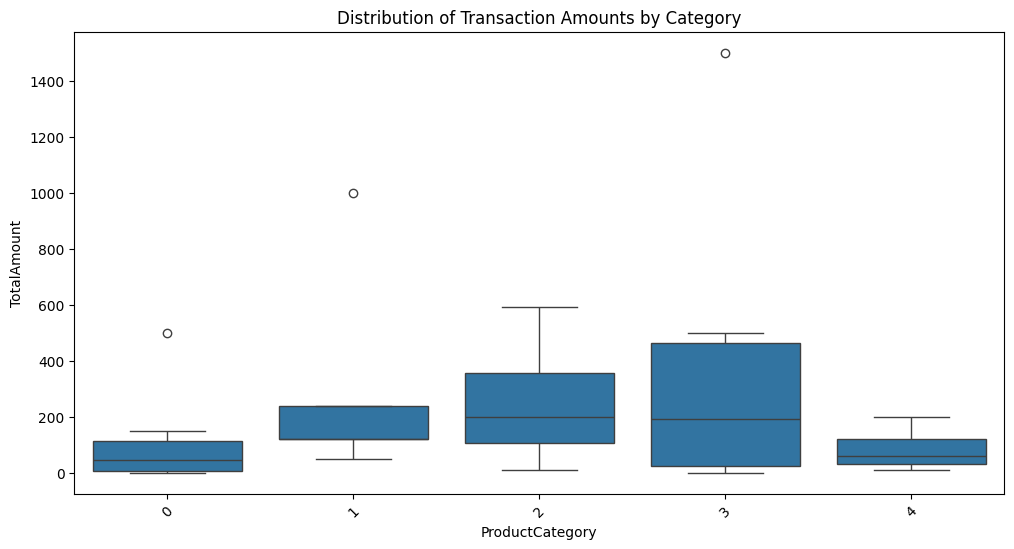

In [237]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ProductCategory', y='TotalAmount', data=df)
plt.title(' before preprocessing Distribution of Transaction Amounts by Category')
plt.xlabel('ProductCategory')
plt.ylabel('TotalAmount')
plt.xticks(rotation=45)
plt.show()
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ProductCategory', y='TotalAmount', data=df_sorted)
plt.title('after preprocessingDistribution of Transaction Amounts by Category')
plt.xlabel('ProductCategory')
plt.ylabel('TotalAmount')
plt.xticks(rotation=45)
plt.show()



